### CSCN8010
Name: Aniket Tiwari  
ID: 8866818  

In [38]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib.patches as patches 
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_openml

from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

In [18]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
X, y = mnist["data"], mnist["target"]

In [3]:
type(mnist)

sklearn.utils._bunch.Bunch

In [4]:
list(mnist)

['data',
 'target',
 'frame',
 'categories',
 'feature_names',
 'target_names',
 'DESCR',
 'details',
 'url']

In [19]:
print("Shape of data (images):", X.shape)
print("Shape of labels:", y.shape)

Shape of data (images): (70000, 784)
Shape of labels: (70000,)


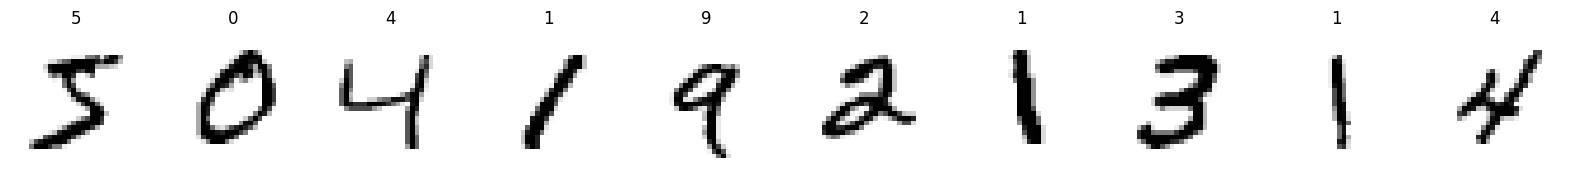

In [20]:
def plot_digit(data, label):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = plt.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.title(label)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X[0:10], y[0:10])):
    plt.subplot(1, 10, index + 1)
    plot_digit(image, label)
plt.show()

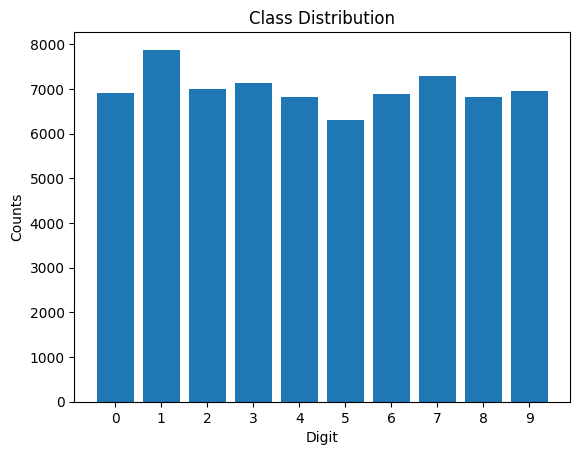

In [22]:
y_int = y.astype(np.int64)
unique, counts = np.unique(y_int, return_counts=True)
plt.bar(unique, counts)
plt.title('Class Distribution')
plt.xlabel('Digit')
plt.ylabel('Counts')
plt.xticks(unique)
plt.show()

- The classes appear to be fairly balanced, indicating that there are approximately equal numbers of instances of each digit in the dataset, ranging from 0 to 9. This suggests that the model trained on this data would not be naturally biased towards more often represented classes, which is encouraging for machine learning applications.  

- '1' appears to have the greatest count, closely followed by '0' and '7'. It seems that the number '5' has the lowest count. The fact that the highest and lowest numbers do not differ significantly, however, indicates that there may not be much of a class divide.  

- The 'Counts' y-axis displays the number of occurrences and spans from 0 to around 8000. Nevertheless, it is impossible to offer specific counts for every digit because the exact numbers are not given.  

- The digits from 0 to 9 are represented by the x-axis, which is marked "Digit." The height of each bar represents the number of times that specific digit appears in the dataset.  


In [30]:
selected_classes = ['8', '9', '2', '5', '7']
mask = [label in selected_classes for label in y]
X_reduced = X[mask]
y_reduced = y[mask]

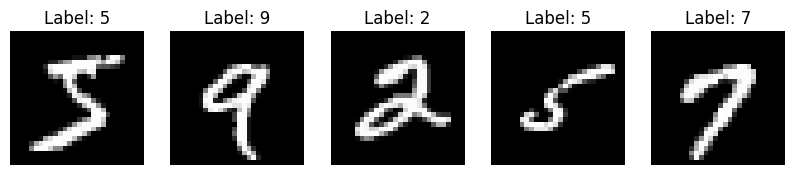

In [31]:
import matplotlib.pyplot as plt

def plot_digit(data, label, ax):
    image = data.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray, interpolation='nearest')
    ax.set_title('Label: {}'.format(label))
    ax.axis('off')

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes.flat):
    plot_digit(X_reduced[i], y_reduced[i], ax)


In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 27503
Validation set size: 3438
Test set size: 3438


[Performance Metrics for Classification](https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/classification-performance-metrics/performance_metrics_for_classification.ipynb)

In [35]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

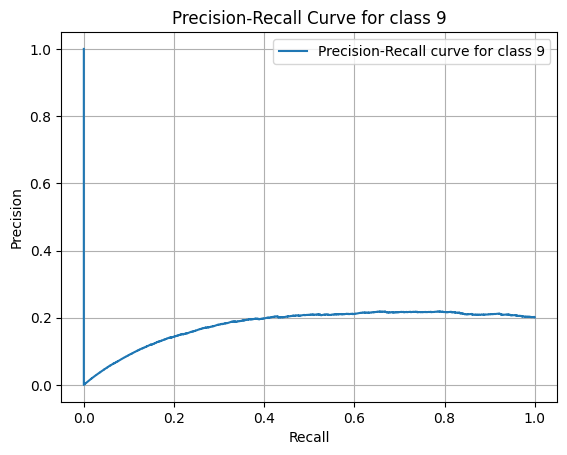

Accuracy: 0.900523560209424
Confusion Matrix:
[[604   6  19  63  16]
 [  6 552   8  52  13]
 [  2   2 676   8  21]
 [  5  13   7 654  20]
 [  1   3  54  23 610]]
Precision: [0.8175     0.89705882 0.97734628 0.95833333 0.88481675]
Recall: [0.93562232 0.88277858 0.85310734 0.8748019  0.95345557]
F1 Scores: [0.87258172 0.88986142 0.91101056 0.91466446 0.91785472]


In [42]:
y_val_pred = sgd_clf.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)


conf_matrix = confusion_matrix(y_val, y_val_pred)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred, labels=selected_classes)

class_of_interest = '9'

y_val_bin = (y_val == class_of_interest).astype(int)

if hasattr(sgd_clf, "decision_function"):
    y_scores = sgd_clf.decision_function(X_val)
    if len(y_scores.shape) > 1:
        y_scores = y_scores[:, selected_classes.index(class_of_interest)]
else:
    y_probas = sgd_clf.predict_proba(X_val)
    y_scores = y_probas[:, selected_classes.index(class_of_interest)]

precision_curve, recall_curve, thresholds = precision_recall_curve(y_val_bin, y_scores)

plt.figure()
plt.plot(recall_curve, precision_curve, label=f'Precision-Recall curve for class {class_of_interest}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for class {class_of_interest}')
plt.legend()
plt.grid(True)
plt.show()

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Scores: {f1_score}")

In [44]:
high_precision_indexes = np.where(precision[:-1] >= 0.9)[0]
if high_precision_indexes.size > 0:
    high_precision_threshold = thresholds[high_precision_indexes[0]]
    print(f"Threshold for high precision: {high_precision_threshold}")
    y_pred_high_precision = (y_scores >= high_precision_threshold).astype(int)
else:
    print("No threshold found that achieves the desired precision of 0.9")

No threshold found that achieves the desired precision of 0.9


In [45]:
high_recall_indexes = np.where(recall[:-1] >= 0.9)[0]
if high_recall_indexes.size > 0:
    high_recall_threshold = thresholds[high_recall_indexes[-1]] 
    print(f"Threshold for high recall: {high_recall_threshold}")
    y_pred_high_recall = (y_scores >= high_recall_threshold).astype(int)
else:
    print("No threshold found that achieves the desired recall of 0.9")

Threshold for high recall: -61265.22964678339


In [46]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
import numpy as np

y_pred = sgd_clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None, labels=selected_classes)
recall = recall_score(y_test, y_pred, average=None, labels=selected_classes)
f1 = f1_score(y_test, y_pred, average=None, labels=selected_classes)

class_of_interest = '9'
y_test_bin = (y_test == class_of_interest)

try:
    y_scores = sgd_clf.decision_function(X_test)
    y_scores_class = y_scores[:, selected_classes.index(class_of_interest)]
except AttributeError: 
    y_probas = sgd_clf.predict_proba(X_test)
    y_scores_class = y_probas[:, selected_classes.index(class_of_interest)]

precision_curve, recall_curve, thresholds = precision_recall_curve(y_test_bin, y_scores_class)

evaluation_results = {
    'Accuracy': accuracy,
    'Confusion Matrix': conf_matrix,
    'Precision by class': dict(zip(selected_classes, precision)),
    'Recall by class': dict(zip(selected_classes, recall)),
    'F1 Score by class': dict(zip(selected_classes, f1)),
    'Precision-Recall Curve Data': {
        'Precision': precision_curve,
        'Recall': recall_curve,
        'Thresholds': thresholds
    }
}

evaluation_results


{'Accuracy': 0.8984874927283304,
 'Confusion Matrix': array([[569,   5,  21,  67,   9],
        [  5, 531,  11,  64,  14],
        [  1,   1, 719,   5,  30],
        [  7,  14,   7, 655,  18],
        [  2,   2,  47,  19, 615]], dtype=int64),
 'Precision by class': {'8': 0.808641975308642,
  '9': 0.8965014577259475,
  '2': 0.9743150684931506,
  '5': 0.9602169981916817,
  '7': 0.893167701863354},
 'Recall by class': {'8': 0.9343794579172611,
  '9': 0.8978102189781022,
  '2': 0.8479880774962743,
  '5': 0.8496,
  '7': 0.951058201058201},
 'F1 Score by class': {'8': 0.8669755129053608,
  '9': 0.8971553610503282,
  '2': 0.9067729083665339,
  '5': 0.9015280135823429,
  '7': 0.9212043561819346},
 'Precision-Recall Curve Data': {'Precision': array([0.19924375, 0.19930172, 0.19935972, ..., 0.        , 0.        ,
         1.        ]),
  'Recall': array([1., 1., 1., ..., 0., 0., 0.]),
  'Thresholds': array([-123309.31065713, -121766.23625094, -117801.09998936, ...,
           63684.83636863,   

- The total accuracy of the model is 89.85%. This indicates that roughly 89.85% of the model's predictions are accurate.  

- Confusion Matrix: An algorithm's performance can be visualized using this particular table arrangement. In the matrix, the examples in a predicted class are represented by each column, and the occurrences in an actual class are represented by each row. While there were misclassifications for other classes (five instances projected as '9', twenty-one as '2', etc.), 569 instances for the class '8', for instance, were correctly predicted (true positives).  

- By class, precision can be calculated as the difference between the total number of true positives and the total number of false positives. It displays the proportion of objects that are truly part of the class that they are labeled as. All classes in the model exhibit great precision; class '2' has the highest precision (97.43%), while class '8' has the lowest (80.86%).  

- Recall by Class: Recall is calculated by dividing the total number of false negatives by the total number of false positives. It shows the proportion of real positives that the model catches when it is classified as positive. With the maximum recall of class '7' (95.11%), the model appears to be able to capture the majority of '7' instances. With the lowest recall (84.80%), class '2' misses around 15% of the real '2' instances.  

- F1 Score by Class: The precision and recall harmonic means are used to calculate the F1 score. Perfect recall and precision yield an F1 score of 1, while perfect recall and precision yield a score of 0. Class '2' has the highest F1 score (90.68%), suggesting that memory and precision are well-balanced. Class '8' has the lowest F1 score (86.70%), which might be the result of a poorer recall than other classes.  

- Data for Precision-Recall Curve: A precision-recall curve is a graph that illustrates the trade-off between recall and precision for various thresholds. It is created with this data. High precision is correlated with a low false positive rate, while high recall is correlated with a low false negative rate. An area under the curve with a high value indicates both high recall and high precision.  